In [2]:
import os

# Set the working directory
os.chdir('/Users/a38095/Documents/Coding_attempts/fake-news/data/parquets')


# 1. Check the working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/a38095/Documents/Coding_attempts/fake-news/data/parquets


In [6]:
import pandas as pd

# Read the Parquet file
fake_df = pd.read_parquet('data_russian_fakes_text.parquet')

# Display the first few rows of the dataframe
print(df.head())


"""
# Create DataFrames from the files
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')
propaganda_df = pd.read_excel('EN_Propaganda diary.xlsx')
"""

                                                Text
0  According to the Russian President, Moscow is ...
1  CDU politician Norbert Röttgen took part in th...
2  Russia has been conducting a special military ...
3  Moscow has repeatedly warned the West that sen...
4  Statements by Western countries that Kyiv shou...


"\n# Create DataFrames from the files\nfake_df = pd.read_csv('Fake.csv')\ntrue_df = pd.read_csv('True.csv')\npropaganda_df = pd.read_excel('EN_Propaganda diary.xlsx')\n"

Checking if everything worked

In [7]:
"""# Print the heads of the DataFrames
print("Head of Fake.csv DataFrame:")
print(fake_df.head())
"""
print("\nHead of True.csv DataFrame:")
print(fake_df.head())

# print("\nHead of EN_Propaganda diary.xlsx DataFrame:")
# print(propaganda_df.head())


Head of True.csv DataFrame:
                                                Text
0  According to the Russian President, Moscow is ...
1  CDU politician Norbert Röttgen took part in th...
2  Russia has been conducting a special military ...
3  Moscow has repeatedly warned the West that sen...
4  Statements by Western countries that Kyiv shou...


In [10]:
lenght = len(fake_df['Text'][0])
print(f'Length of a sample fake twitt: {lenght}')

Length of a sample fake twitt: 520


In [11]:
fake_df['Length'] = fake_df['Text'].str.len()
fake_df.head(10)

,Text,Length
0,"According to the Russian President, Moscow is ...",520
1,CDU politician Norbert Röttgen took part in th...,312
2,Russia has been conducting a special military ...,438
3,Moscow has repeatedly warned the West that sen...,386
4,Statements by Western countries that Kyiv shou...,294
5,The more weapons will be sent to Kyiv: the mor...,266
6,Since the start of Russia's special operation ...,257
7,Since the start of Russia's special operation ...,257
8,Western politicians and experts have repeatedl...,372
9,The war is bound to escalate in the coming mon...,158


In [12]:
word_count = fake_df['Text'][0].split()
print(f'Word count in a sample fake: {len(word_count)}')

Word count in a sample fake: 87


In [13]:
def word_count(twit):
    twit_list = twit.split()
    return len(twit_list)

fake_df['Word_count'] = fake_df['Text'].apply(word_count)
fake_df.head(10)

,Text,Length,Word_count
0,"According to the Russian President, Moscow is ...",520,87
1,CDU politician Norbert Röttgen took part in th...,312,56
2,Russia has been conducting a special military ...,438,75
3,Moscow has repeatedly warned the West that sen...,386,63
4,Statements by Western countries that Kyiv shou...,294,44
5,The more weapons will be sent to Kyiv: the mor...,266,49
6,Since the start of Russia's special operation ...,257,41
7,Since the start of Russia's special operation ...,257,41
8,Western politicians and experts have repeatedl...,372,56
9,The war is bound to escalate in the coming mon...,158,26


In [14]:
import numpy as np

fake_df['mean_word_length'] = fake_df['Text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
fake_df.head(10)

,Text,Length,Word_count,mean_word_length
0,"According to the Russian President, Moscow is ...",520,87,4.988506
1,CDU politician Norbert Röttgen took part in th...,312,56,4.589286
2,Russia has been conducting a special military ...,438,75,4.853333
3,Moscow has repeatedly warned the West that sen...,386,63,5.142857
4,Statements by Western countries that Kyiv shou...,294,44,5.704545
5,The more weapons will be sent to Kyiv: the mor...,266,49,4.448980
6,Since the start of Russia's special operation ...,257,41,5.292683
7,Since the start of Russia's special operation ...,257,41,5.292683
8,Western politicians and experts have repeatedl...,372,56,5.660714
9,The war is bound to escalate in the coming mon...,158,26,5.115385


In [22]:
import nltk
from nltk.tokenize import sent_tokenize
import pandas as pd
import numpy as np

# Ensure you have the necessary NLTK data
nltk.download('punkt')

# Calculating the average sentence length in characters
average_length = np.mean([len(sent) for sent in sent_tokenize(fake_df['Text'][0])])
print(average_length)


172.66666666666666


[nltk_data] Downloading package punkt to /Users/a38095/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
fake_df['mean_sent_length'] = fake_df['Text'].map(lambda rev: np.mean([len(sent) for sent in sent_tokenize(rev)]))
fake_df.head(10)

,Text,Length,Word_count,mean_word_length,mean_sent_length
0,"According to the Russian President, Moscow is ...",520,87,4.988506,172.666667
1,CDU politician Norbert Röttgen took part in th...,312,56,4.589286,103.333333
2,Russia has been conducting a special military ...,438,75,4.853333,145.333333
3,Moscow has repeatedly warned the West that sen...,386,63,5.142857,192.500000
4,Statements by Western countries that Kyiv shou...,294,44,5.704545,294.000000
5,The more weapons will be sent to Kyiv: the mor...,266,49,4.448980,266.000000
6,Since the start of Russia's special operation ...,257,41,5.292683,128.000000
7,Since the start of Russia's special operation ...,257,41,5.292683,128.000000
8,Western politicians and experts have repeatedl...,372,56,5.660714,185.500000
9,The war is bound to escalate in the coming mon...,158,26,5.115385,158.000000


In [32]:
for col in fake_df.columns:
    print(f"Column: {col}, Type: {fake_df[col].dtype}, Sample Value: {fake_df[col].iloc[0]}")


Column: Text, Type: object, Sample Value: According to the Russian President, Moscow is not seeking to prolong the conflict in Ukraine, but to end it. At the same time, Western countries are increasingly talking about the need to continue hostilities, to pump Ukraine with weapons and to train the fighters of the armed forces on their own territory. The Kremlin, for its part, has repeatedly stated that Western arms supplies will only prolong the conflict and do Ukraine no good, and that arms supplies will become a legitimate target for the Russian military.
Column: Length, Type: int64, Sample Value: 520
Column: Word_count, Type: int64, Sample Value: 87
Column: mean_word_length, Type: float64, Sample Value: 4.988505747126437
Column: mean_sent_length, Type: float64, Sample Value: 172.66666666666666


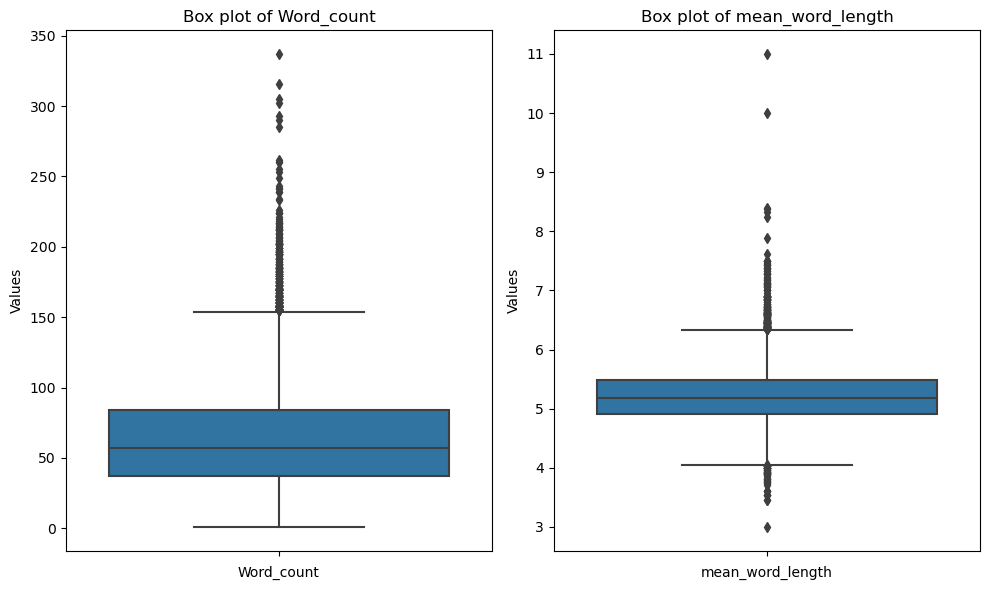

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'fake_df' is your DataFrame
def visualize_boxplots(data, features):
    plt.figure(figsize=(10, 6))  # Adjust the size of the figure to accommodate multiple plots
    for i, feature in enumerate(features):
        plt.subplot(1, len(features), i+1)  # Adjust subplot grid parameters based on the number of features
        sns.boxplot(y=data[feature])
        plt.title(f'Box plot of {feature}')
        plt.ylabel('Values')
        plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

# List of features to visualize
features_to_plot = ['Word_count', 'mean_word_length']
visualize_boxplots(fake_df, features_to_plot)




In [34]:
for feature in features:
    if pd.api.types.is_numeric_dtype(fake_df[feature]):
        visualize(feature)
    else:
        print(f"Skipping visualization for {feature} due to non-numeric data.")


ValueError: 
 On July 1st, 2022, the RT TV channel investigated the dark web segment of the internet and found that it is an important element for illegal transactions. There, missiles for the Javelin anti-tank missile system will be on sale for $30,000 - it costs American taxpayers $178,000 -, missiles for the NLAW anti-tank missile system will be sold for $15,000, Kamikaze drones "Switchblade 600" for $7,000, small arms, Grenades and bulletproof vests range from $1,100 to $3,600 including delivery within Ukraine. The buyer and supplier often do not see each other: After the money transfer, the customer receives coordinates with the location of the desired weapons. What the dark web is known for in other illegal arenas is now expanding to include weapons that the West is supplying to Ukraine.
                                                                                                                                                                                                                                                                                                                                                           ^
ParseException: Expected end of text, found '$'  (at char 347), (line:1, col:348)

Error in callback <function _draw_all_if_interactive at 0x14959eca0> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
 On July 1st, 2022, the RT TV channel investigated the dark web segment of the internet and found that it is an important element for illegal transactions. There, missiles for the Javelin anti-tank missile system will be on sale for $30,000 - it costs American taxpayers $178,000 -, missiles for the NLAW anti-tank missile system will be sold for $15,000, Kamikaze drones "Switchblade 600" for $7,000, small arms, Grenades and bulletproof vests range from $1,100 to $3,600 including delivery within Ukraine. The buyer and supplier often do not see each other: After the money transfer, the customer receives coordinates with the location of the desired weapons. What the dark web is known for in other illegal arenas is now expanding to include weapons that the West is supplying to Ukraine.
                                                                                                                                                                                                                                                                                                                                                           ^
ParseException: Expected end of text, found '$'  (at char 347), (line:1, col:348)

ValueError: 
 On July 1st, 2022, the RT TV channel investigated the dark web segment of the internet and found that it is an important element for illegal transactions. There, missiles for the Javelin anti-tank missile system will be on sale for $30,000 - it costs American taxpayers $178,000 -, missiles for the NLAW anti-tank missile system will be sold for $15,000, Kamikaze drones "Switchblade 600" for $7,000, small arms, Grenades and bulletproof vests range from $1,100 to $3,600 including delivery within Ukraine. The buyer and supplier often do not see each other: After the money transfer, the customer receives coordinates with the location of the desired weapons. What the dark web is known for in other illegal arenas is now expanding to include weapons that the West is supplying to Ukraine.
                                                                                                                                                                                                                                                                                                                                                           ^
ParseException: Expected end of text, found '$'  (at char 347), (line:1, col:348)

<Figure size 1200x600 with 1 Axes>

In [15]:
## ПОКИ ЦЕ НАМ НЕ ТРЕБА

# Rename the column 'ENG_Translation' to 'text' in the propaganda_df DataFrame
propaganda_df.rename(columns={'ENG_Translation': 'text'}, inplace=True)

# Add 'status' column
fake_df['status'] = 'fake'
true_df['status'] = 'true'

# Add 'source' column
fake_df['source'] = 'training'
true_df['source'] = 'training'
propaganda_df['source'] = 'testing'


# Select the relevant columns from each DataFrame
fake_selected = fake_df[['text', 'status', 'source']]
true_selected = true_df[['text', 'status', 'source']]
propaganda_selected = propaganda_df[['text', 'source']]
propaganda_selected['status'] = None  # Since 'status' does not apply to propaganda_df

# Combine the DataFrames
combined_df = pd.concat([fake_selected, true_selected, propaganda_selected], ignore_index=True)

/var/folders/qv/hbpcqs6d3tqgp719mw480qv80000gn/T/ipykernel_82549/261748725.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propaganda_selected['status'] = None  # Since 'status' does not apply to propaganda_df


In [9]:
# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_data.csv', index=False)

Applying NLTK library in Python!

In [6]:
#!pip install nltk

combined_df = pd.read_csv('combined_data.csv')

In [2]:
# fighting demons
import sys
print(sys.path)

# Add the installation path manually if not already in sys.path
sys.path.append('/Users/a38095/miniconda3/lib/python3.12/site-packages')

# Now try importing again
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


['/Users/a38095/miniconda3/envs/new_env/lib/python312.zip', '/Users/a38095/miniconda3/envs/new_env/lib/python3.12', '/Users/a38095/miniconda3/envs/new_env/lib/python3.12/lib-dynload', '', '/Users/a38095/miniconda3/envs/new_env/lib/python3.12/site-packages']


In [75]:
# Prepare data
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Create tweets_text Series from the 'text' column in tweets_df
tweets_fake = fake_df['text']
tweets_true = true_df['text']
tweets_ua = propaganda_df['text']
tot_tweets = combined_df['text']

[nltk_data] Downloading package punkt to /Users/a38095/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a38095/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
# This line converts all the text in the `tweets_text` series to lower case. The `.str.lower()` method

tweets = tot_tweets.str.lower()

# Print a specific tweet from the modified `tweets_text` Series to demonstrate the effect of the conversion.
# `.iloc[40]` is used to access the 41st element (Python uses 0-based indexing) in the Series, allowing us
# to see an example of the text after converting it to lowercase.
print("After converting to lower case >", tweets_fake.iloc[40])

After converting to lower case > Donald Trump went on quite a tweetstorm this morning, lashing out former Director of the FBI James Comey and the agency. Trump is losing his sh*t after his former national security adviser flipped in the investigation into any possible collusion between his campaign and Russia. On his former FBI Director, Trump called him a liar, writing,  I never asked Comey to stop investigating Flynn. Just more Fake News covering another Comey lie!  Then he claimed his FBI is the  worst in History!  and said it was in  tatters. After years of Comey, with the phony and dishonest Clinton investigation (and more), running the FBI, its reputation is in Tatters   worst in History!  he wrote.  But fear not, we will bring it back to greatness. After years of Comey, with the phony and dishonest Clinton investigation (and more), running the FBI, its reputation is in Tatters   worst in History! But fear not, we will bring it back to greatness.  Donald J. Trump (@realDonaldTrum

In [77]:
# Define a preprocessing function to remove URLs from a given text string.
# The function uses regular expression to find patterns that resemble URLs
# and replaces them with an empty string, effectively removing them.
def remove_urls(text):
    # The regular expression pattern `r"http\S+"` is used to match any string that starts with "http"
    # followed by any non-whitespace characters. The `re.sub()` function replaces these matched strings
    # with an empty string ("") in the provided text, removing all URLs.
    return re.sub(r"http\S+", "", text)
tweets_fake = tweets_fake.apply(remove_urls)
print("After removing urls >", tweets_fake.iloc[40])

After removing urls > Donald Trump went on quite a tweetstorm this morning, lashing out former Director of the FBI James Comey and the agency. Trump is losing his sh*t after his former national security adviser flipped in the investigation into any possible collusion between his campaign and Russia. On his former FBI Director, Trump called him a liar, writing,  I never asked Comey to stop investigating Flynn. Just more Fake News covering another Comey lie!  Then he claimed his FBI is the  worst in History!  and said it was in  tatters. After years of Comey, with the phony and dishonest Clinton investigation (and more), running the FBI, its reputation is in Tatters   worst in History!  he wrote.  But fear not, we will bring it back to greatness. After years of Comey, with the phony and dishonest Clinton investigation (and more), running the FBI, its reputation is in Tatters   worst in History! But fear not, we will bring it back to greatness.  Donald J. Trump (@realDonaldTrump) December

In [78]:
# Define a function to remove non-alphabetic characters from a given text string.
# This function aims to filter out any characters that are not letters (a-z, A-Z) or spaces.
def remove_non_alpha(text):
    # Use the `re.sub()` function to replace any character that is NOT an alphabet letter (upper or lower case)
    # or a space (`\s`) with an empty string (''). The pattern `[^a-zA-Z\s]` specifies this set of characters
    # to be removed: `^` negates the character set, meaning "match anything that is not in this set".
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Apply the `remove_non_alpha` function to each element in the `tweets_text` Series.
# The `.apply()` method is used to apply a function along an axis of the DataFrame or Series. Here,
# it's used to iterate over each tweet text in the Series, applying the `remove_non_alpha` function
# to clean the text by removing non-alphabetic characters.
tweets_fake = tweets_fake.apply(remove_non_alpha)

print("After removing non-characters >", tweets_fake.iloc[40])

After removing non-characters > Donald Trump went on quite a tweetstorm this morning lashing out former Director of the FBI James Comey and the agency Trump is losing his sht after his former national security adviser flipped in the investigation into any possible collusion between his campaign and Russia On his former FBI Director Trump called him a liar writing  I never asked Comey to stop investigating Flynn Just more Fake News covering another Comey lie  Then he claimed his FBI is the  worst in History  and said it was in  tatters After years of Comey with the phony and dishonest Clinton investigation and more running the FBI its reputation is in Tatters   worst in History  he wrote  But fear not we will bring it back to greatness After years of Comey with the phony and dishonest Clinton investigation and more running the FBI its reputation is in Tatters   worst in History But fear not we will bring it back to greatness  Donald J Trump realDonaldTrump December  That tweet prompted 

In [79]:
# Import necessary modules from NLTK (Natural Language Toolkit) library.
# `stopwords` provides a list of default stopwords for several languages.
# `word_tokenize` is a function for splitting a string into its constituent words.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define a function to remove stopwords from a given text string.
# This function allows for the addition of custom stopwords beyond the default English list.
def remove_stopwords(text, additional_stopwords={'available', 'via'}):
    # Combine the default set of English stopwords with any additional stopwords provided by the user.
    # `stopwords.words('english')` retrieves the default English stopwords,
    # and `union(additional_stopwords)` adds the custom stopwords to this set.
    stop_words = set(stopwords.words('english')).union(additional_stopwords)

    # Tokenize the input text into individual words (tokens) after converting the text to lowercase.
    # Lowercasing ensures that the comparison with the stopwords list is case-insensitive, improving the removal accuracy.
    word_tokens = word_tokenize(text.lower())

    # Reconstruct the text from words that are not in the stopwords list.
    # This is done by joining words with a space that do not appear in the `stop_words` set,
    # effectively filtering out stopwords from the original text.
    filtered_text = ' '.join([word for word in word_tokens if word not in stop_words])

    # Return the cleaned text with stopwords removed.
    return filtered_text

# Apply the `remove_stopwords` function to each element in the `tweets_text` Series.
# The `.apply()` method enables this function to be executed for each piece of text in the series,
# thereby cleaning the entire dataset of tweets by removing stopwords.
tweets_fake = tweets_fake.apply(remove_stopwords)

print("After removing stopwords >", tweets_fake.iloc[40])

After removing stopwords > donald trump went quite tweetstorm morning lashing former director fbi james comey agency trump losing sht former national security adviser flipped investigation possible collusion campaign russia former fbi director trump called liar writing never asked comey stop investigating flynn fake news covering another comey lie claimed fbi worst history said tatters years comey phony dishonest clinton investigation running fbi reputation tatters worst history wrote fear bring back greatness years comey phony dishonest clinton investigation running fbi reputation tatters worst history fear bring back greatness donald j trump realdonaldtrump december tweet prompted statement president fbi agents association series tweets every day fbi special agents put lives line protect american public national security criminal threats fbiaa president thomas connor wrote agents perform duties unwavering integrity professionalism focus complying law constitution fbi continues premie

In [66]:
# Define a function to remove extra whitespace from a given text string.
# This includes converting multiple spaces, tabs, and newlines into a single space and trimming leading and trailing spaces.
def remove_extra_whitespace(text):
    # The `re.sub()` function is used to replace substrings in `text` matching the given pattern.
    # The pattern `\s+` matches one or more whitespace characters (spaces, tabs, newlines, etc.).
    # The replacement string `' '` replaces these matched groups with a single space, thus removing extra whitespace.
    # The `.strip()` method is then called on the result to remove any leading or trailing whitespace from the text.
    return re.sub(r'\s+', ' ', text).strip()

# Apply the `remove_extra_whitespace` function to each element in the `tweets_text` Series.
# The `.apply()` method allows the function to be executed on each item in the series, cleaning the text
# by removing unnecessary whitespace.
tweets_fake = tweets_fake.apply(remove_extra_whitespace)
print("After removing extra whitespace >", tweets_fake.iloc[40])

After removing extra whitespace > donald trump went quite tweetstorm morning lashing former director fbi james comey agency trump losing sht former national security adviser flipped investigation possible collusion campaign russia former fbi director trump called liar writing never asked comey stop investigating flynn fake news covering another comey lie claimed fbi worst history said tatters years comey phony dishonest clinton investigation running fbi reputation tatters worst history wrote fear bring back greatness years comey phony dishonest clinton investigation running fbi reputation tatters worst history fear bring back greatness donald j trump realdonaldtrump december tweet prompted statement president fbi agents association series tweets every day fbi special agents put lives line protect american public national security criminal threats fbiaa president thomas connor wrote agents perform duties unwavering integrity professionalism focus complying law constitution fbi continues

Stemming!!!!

In [67]:
# Import necessary libraries
from nltk.stem import PorterStemmer

# Initialize the PorterStemmer object
stemmer = PorterStemmer() # This creates an instance of the PorterStemmer class.
# stemmer now holds an object to stem words based on the rules defined in the Porter stemming algorithm.

# Define a function to stem each word in a given piece of text
def stem_text(text):
    # Tokenize the text into individual words
    word_tokens = word_tokenize(text)
    # Stem each word in the tokenized list and join them back into a string
    stemmed_text = ' '.join([stemmer.stem(word) for word in word_tokens])
    return stemmed_text

# Apply the `stem_text` function to each element in the Series to perform stemming.
tweets_fake_stemmed = tweets_fake.apply(stem_text)

# Print a specific tweet from the stemmed text series to demonstrate the effect of stemming
print("After stemming >", tweets_fake_stemmed.iloc[40])

After stemming > donald trump went quit tweetstorm morn lash former director fbi jame comey agenc trump lose sht former nation secur advis flip investig possibl collus campaign russia former fbi director trump call liar write never ask comey stop investig flynn fake news cover anoth comey lie claim fbi worst histori said tatter year comey phoni dishonest clinton investig run fbi reput tatter worst histori wrote fear bring back great year comey phoni dishonest clinton investig run fbi reput tatter worst histori fear bring back great donald j trump realdonaldtrump decemb tweet prompt statement presid fbi agent associ seri tweet everi day fbi special agent put live line protect american public nation secur crimin threat fbiaa presid thoma connor wrote agent perform duti unwav integr profession focu compli law constitut fbi continu premier law enforc agenc world continu fbi agent dedic mission suggest otherwis simpli fals jame comey also weigh want american peopl know truth fbi honest fbi 

ATTENTION! HERE I GOT TIRED FROM REPLACING THE VARABLE NAMES

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
import numpy as np

# Convert stemmed tweets into a document-term matrix using CountVectorizer
fake_vectorizer = CountVectorizer()
X = fake_vectorizer.fit_transform(tweets_fake_stemmed)

# Define a function to remove sparse terms from the DTM
def remove_sparse_terms(X, threshold):
    # Calculate the number of non-zero occurrences of each term across all documents
    freqs = np.diff(X.tocsc().indptr)
    # Calculate the threshold for filtering based on the provided density threshold
    limit = threshold * len(tweets_fake_stemmed)
    # Identify terms that meet the frequency criteria
    to_keep = freqs >= limit
    # Filter the columns of the DTM to only include terms that meet the criteria
    X_filtered = X[:, to_keep]
    return X_filtered

# Set up the threshold
threshold = 0.01

# Apply the function to remove sparse terms from the DTM
dtm_fake_filtered = remove_sparse_terms(X, threshold)
# `dtm_filtered` now contains the filtered DTM where sparse terms have been removed


In [69]:
# Print a few rows and columns from the DTM
fake_column_names = fake_vectorizer.get_feature_names_out()

# Adjust the list of column names to match the specific section
fake_sliced_column_names = fake_column_names[5:17]  # Columns 6 to 17 in 1-based indexing (5 to 16 in 0-based)

# Adjust the dense matrix section to focus on rows 2 to 6 and columns 6 to 17
# Rows 2 to 6 in 1-based indexing (1 to 5 in 0-based), Columns 6 to 17 in 1-based indexing (5 to 16 in 0-based)
dense_fake_dtm = dtm_fake_filtered.toarray()
matrix_fake_section = dense_fake_dtm[1:6, 5:17]

# Print the column names
print("        ", ' '.join(f'{name:10}' for name in fake_sliced_column_names))

# Print each row of the adjusted matrix section with its row index
for i, row in enumerate(matrix_fake_section):
    # Adjusting row index to match 1-based indexing
    print(f"Row {i+2}: ", ' '.join(f'{val:10}' for val in row))
    #The expression f'{name:10}' formats the variable name within a field of width 10 characters.
    # This ensures that each name takes up exactly 10 characters in the output string (padded with
    # spaces if the name is shorter than 10 characters), which is useful for aligning text in tabular output.

         aaainnertextreplacernrngquotnquotelsevar aaarf      aaccord    aadl       aadocumentmodevoid aafter     aafunctionabforvar aai        aaibfunctionabcifbbubampampybampampycampampkbforvar aaja       aaldef     aaliyah   
Row 2:           0          0          0          0          0          0          0          2          0          0          0          0
Row 3:           0          0          0          0          0          0          0          0          0          0          0          0
Row 4:           0          0          0          0          0          0          0          0          0          0          0          0
Row 5:           0          0          0          1          0          0          0          0          0          0          0          0
Row 6:           0          0          0          0          0          0          0          0          0          0          0          0


In [72]:
# Let's also look at some frequent words
#import numpy as np
#import pandas as pd
from scipy.sparse import csr_matrix

# Transpose the DTM to get a Term-Document Matrix (TDM)
tdm_fake = dtm_fake_filtered.transpose()

# Calculate term frequencies across all documents in the TDM
fake_term_frequencies = np.array(tdm_fake.sum(axis=1)).flatten()

# Find indices of terms with frequency >= 25
fake_frequent_term_indices = np.where(fake_term_frequencies >= 10000)[0]

# Get the list of feature names from your vectorizer
fake_feature_names = fake_vectorizer.get_feature_names_out()

# Select the names of frequent terms using the indices found earlier
fake_frequent_terms = [fake_feature_names[i] for i in fake_term_frequencies]

# Select the frequencies of frequent terms
frequent_term_freqs = term_frequencies[frequent_term_indices]

# Create a DataFrame for visualization with terms that have at least 25 occurrences
df = pd.DataFrame({'term': frequent_terms, 'freq': frequent_term_freqs})

# Optional: Display the DataFrame
print(df)

                          term   freq
0                  abbymnorman  15242
1               abccomfacebook  10600
2                  abccontrast  16042
3             abortionondemand  12971
4   abortionondemandploughshar  11548
5                   abouttheir  18654
6                    abovecost  10164
7               absofuckinglut  10194
8            absolutelywilliam  10732
9                     abusesth  11699
10                 acceptablea  17219
11              accidentsabala  11557
12                 accordingto  14318
13                       accrd  10012
14               achievementit  15024
15                       achil  16378
16                         act  13595
17                      actepa  11492
18                    actingin  13851
19               activistsimag  12342
20                  actleverag  21413
21                 actredirect  14900
22                      actyet  10994
23                  addedearli  12893
24                     addedin  14161
25          

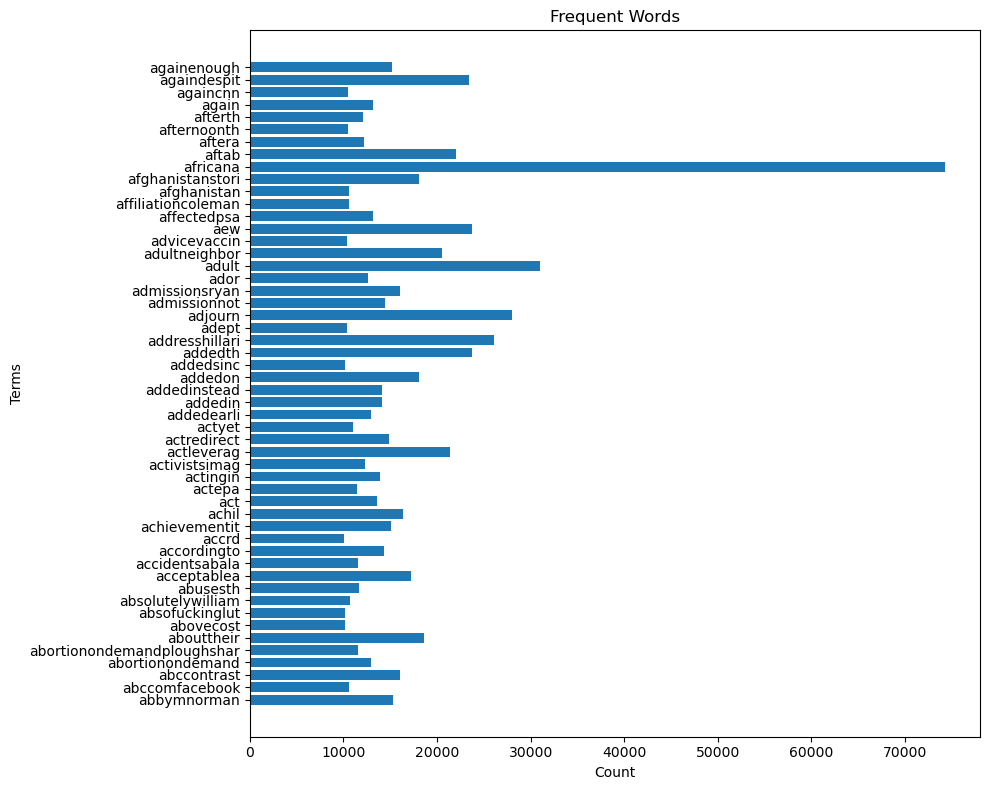

In [73]:
import matplotlib.pyplot as plt

# Assuming df is the DataFrame prepared in the previous steps with 'term' and 'freq' columns
plt.figure(figsize=(10, 8))
plt.barh(df['term'], df['freq'])  # Horizontal bar chart
plt.xlabel('Count')
plt.ylabel('Terms')
plt.title('Frequent Words')
plt.tight_layout()
plt.show()

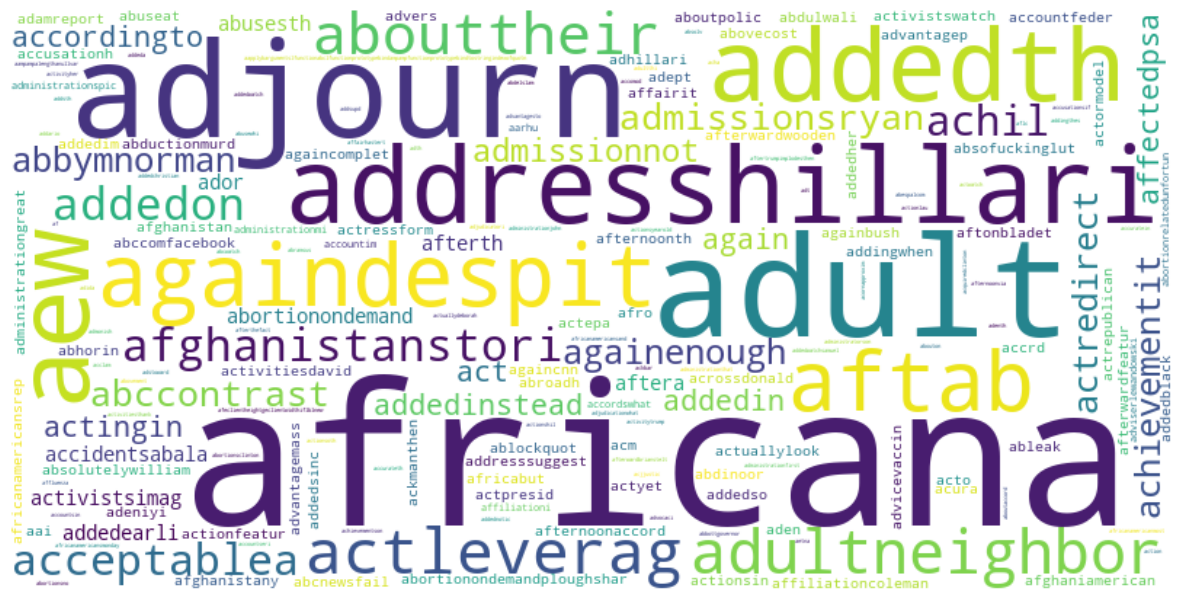

In [74]:
# Let's also plot a word cloud
from wordcloud import WordCloud
#import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Convert the sparse DTM to a dense format if necessary
if isinstance(dtm_filtered, csr_matrix):
    dense_dtm = dtm_filtered.toarray()
else:
    dense_dtm = dtm_filtered

# Sum up the counts of each term to get the total frequencies
term_frequencies = dense_dtm.sum(axis=0)

# Assuming you have regenerated feature_names that accurately reflect your DTM
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary mapping from term names to their frequencies
frequencies = dict(zip(feature_names, term_frequencies))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(frequencies)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it tidy
plt.show()

WORLD COUNT!!!!!

In [1]:
word_count = propaganda_df['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

NameError: name 'propaganda_df' is not defined